Generate gaussian data
===

Generate two balanced distributions with n poinds in dimension d

In [9]:
import torch


# dimension d and number of samples n
d = 2
n = 1000

# distribution parameters (two distributions, distribution 0 and distribution 1)
mu_0 = torch.zeros(n, d)
mu_1 = torch.zeros(n, d)
mu_1[:, 0] = 1
sigma = 0.2

# generate x with distribution 0 (corresponding to labels -1)
x_0 = torch.normal(0, 1, size=(n, d)) * sigma + mu_0
t_0 = - torch.ones(n)

# generate x with distribution 1 (corresponding to labels +1)
x_1 = torch.normal(0, 1, size=(n, d)) * sigma + mu_1
t_1 = torch.ones(n)

# stack them 
X = torch.cat((x_0, x_1), dim=0)
T = torch.cat((t_0, t_1), dim=0)

# generate y 
x_0.size(), x_1.size(), t_0.size(), t_1.size(), X.size(), T.size()

(torch.Size([1000, 2]),
 torch.Size([1000, 2]),
 torch.Size([1000]),
 torch.Size([1000]),
 torch.Size([2000, 2]),
 torch.Size([2000]))

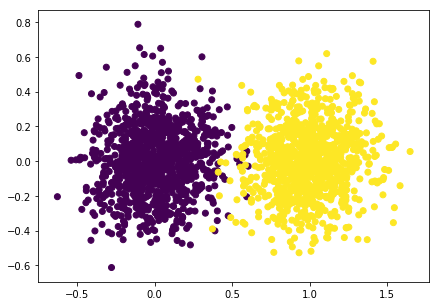

In [10]:
import matplotlib.pyplot as plt

plt.figure(figsize=(7, 5))
plt.scatter(X[:, 0], X[:, 1], c=T)
plt.show()

Code loss function and its gradient
===

With formulas avec w et bias

In [ ]:
def loss_function(w, b, X, T):
    
    return ...

Gradcheck the gradient
====
We use finite difference approximations to check that
```loss_function(w + h, b + h, X, T) - loss_function(w - h, b - h, X, T)) / 2h```

is close to the gradient
```gradient(w, b, X, T)```

Pytorch version
===
With nn.Modules


In [62]:
# define a linear layer (fully conected)
model = nn.Linear(d, 1)

# this is the logistic regression loss
loss = nn.BCEWithLogitsLoss()

# we recover the Y's that are in {0, 1} from the T's that are in {-1, 1}
Y = (T + 1) / 2

# define an optimizer that will do the gradient steps
sgd = torch.optim.SGD(model.parameters(), 0.1)

# training loop 
for step in range(2000):
    l_ = loss(model(X)[:,0], Y) # 1: forward
    l_.backward()               # 2: backward
    sgd.step()                  # 3: gradient step 

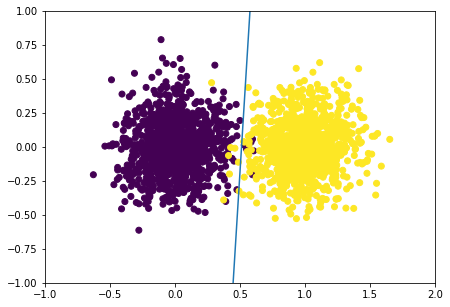

In [63]:
# how to recover the hyperplane from the model?
new_w = model.weight.data
new_b = model.bias.data
points = torch.linspace(-10, 10, 100)
hyperplane = -new_w[0, 0] / new_w[0, 1] * points - new_b / new_w[0, 1]

# plot the hyperplane and see that it does separate well the data
plt.figure(figsize=(7, 5))
plt.plot(points, hyperplane)
plt.xlim([-1, 2])
plt.ylim([-1, 1])
plt.scatter(X[:, 0], X[:, 1], c=T)
plt.show()